Importing all libraries required.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
s_data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Data imported successfully

In this dataset we have "Hours" as the independent variable and "Scores" as the dependent variable. Since we have only one independent variable "Hours" Simple linear regression is used.

We now plot our data points on 2-D graph to get a fair idea of the relationship between variables.

Text(0, 0.5, 'Percentage Scores')

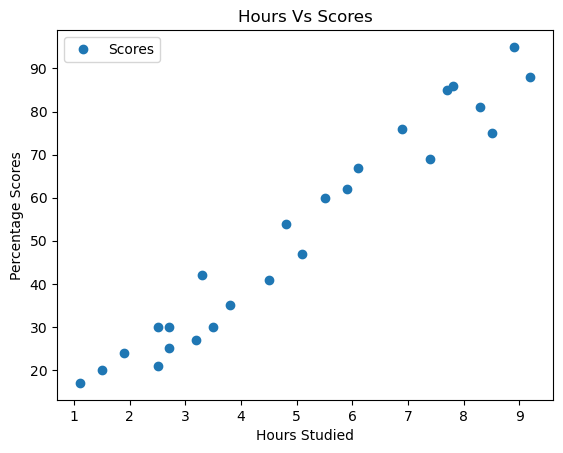

In [4]:
s_data.plot(x='Hours', y='Scores', style='o')
plt.title('Hours Vs Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scores')

Since the graph depicts linear relationship between dependent and independent variable, therefore to predict scores based on hours we will use machine learning algorithm, simple linear regression.

We will now split the data vertically to store the independent variable in input variable 'x' and dependent variable in output variable 'y'.

In [5]:
x = s_data.iloc[:,:-1].values #including all columns except the last one.
y = s_data.iloc[:,-1].values #including the last column.

We now split the data into training and testing datasets using Scikit-Learn's built-in train_test_split() method:

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

Note: random_state ensures that the same randomly selected samples from the 1st time remain when the code is re-executed.

Creating a blank model:

In [7]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

Training the model:

In [8]:
regressor.fit(x_train,y_train)
print("Training complete.")

Training complete.


We now plot the regression line

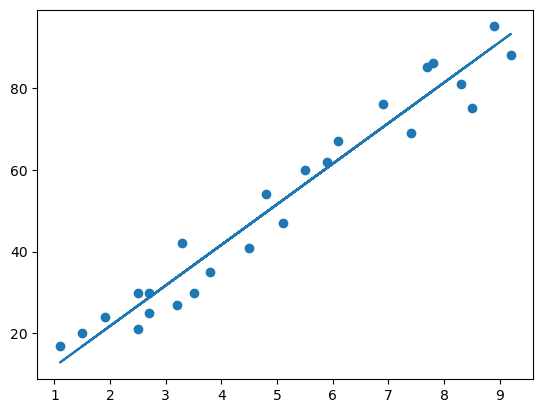

In [9]:
line = regressor.coef_*x+regressor.intercept_
plt.scatter(x,y)
plt.plot(x,line)
plt.show()

Making Predictions:
Now that we have trained our algorithm, we can further make predictions

In [10]:
y_pred = regressor.predict(x_test)
#Comparing Actual VS Predicted
df = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


Testing with our own data

In [18]:
hours = np.array([9.25])
hour= hours.reshape(1,1)
own_pred = regressor.predict(hour)
print("No of Hours = {}".format(hour))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737538


We will now evaluate the model by calculating the mean absolute error and R2 score, for which 2 APIs are already available in sklearn.metrics module.

The mean absolute error will tell us about the difference between the actual output and the predicted output by the model.
The R2 score value will tell us whether the model is a good fit or not. If the R2 value is closer to 1 then the model is a good fit.

In [19]:
from sklearn.metrics import mean_absolute_error,r2_score 

In [21]:
print('Mean Absolute Error:',mean_absolute_error(y_test, y_pred))
print('R2 score:',r2_score(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
R2 score: 0.9454906892105356


Since the R2 score value is closer to 1, we can conclude that this model is a good one.